Hello Matthew!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# **Beta Bank Customer Churn Prediction**

## **Project Overview**

Beta Bank has noticed a concerning trend of customer churn, with clients gradually leaving the bank month after month. The goal of this project is to predict whether a customer is likely to leave the bank in the near future based on their past behavior. Using historical data, we will build a machine learning model capable of predicting customer churn and help the bank take preventive actions.

## **Objective**

The objective of this project is to build a supervised learning model with the **maximum possible F1 score** to predict customer churn. The minimum acceptable F1 score is **0.59**. Additionally, the **AUC-ROC** metric will be used to compare the model's performance alongside the F1 score.

## **Data Description**

We will work with a dataset that contains various features related to customer behavior, demographic information, and account details. The key columns in the dataset include:

- `CreditScore`: Customer's credit score
- `Geography`: Customer's country of residence
- `Gender`: Customer's gender
- `Age`: Customer's age
- `Tenure`: Number of years the customer has been with the bank
- `Balance`: Customer's account balance
- `NumOfProducts`: Number of banking products used by the customer
- `HasCrCard`: Whether the customer owns a credit card
- `IsActiveMember`: Whether the customer is an active member
- `EstimatedSalary`: Customer's estimated salary
- `Exited`: The target variable, indicating whether the customer has left the bank

## **Approach**

The project will follow these key steps:

1. **Data Preprocessing**: Download, explore, and prepare the dataset by handling missing values, encoding categorical variables, and scaling numeric features.
2. **Exploratory Data Analysis (EDA)**: Investigate the class imbalance and understand the relationship between features and churn.
3. **Model Training**: Train a series of machine learning models, starting without addressing class imbalance, and analyze their performance.
4. **Class Imbalance Handling**: Improve the model by addressing class imbalance using different techniques (e.g., resampling or class weighting).
5. **Model Evaluation**: Evaluate the model's performance using F1 score and AUC-ROC metric, and select the best performing model.
6. **Final Testing**: Test the final model on a separate test set and ensure it meets the project requirements.

By the end of this project, we aim to provide a reliable model that can help Beta Bank identify customers at risk of leaving, enabling the bank to take proactive measures to retain them.


In [1]:
# Step 1: Data Preprocessing

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/datasets/Churn.csv')

# Drop unnecessary columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Fill missing values with the median
data.fillna(value={'Tenure': data['Tenure'].median()}, inplace=True)

# Verify that there are no missing values left
print("\nMissing values after dropping rows:\n", data.isnull().sum())

print()

# Display the first few rows of the dataset
print(data.head())
print(data.info())


Missing values in each column:
 CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Missing values after dropping rows:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42     2.0       0.00              1   
1          608     Spain  Female   41     1.0   83807.86              1   
2          502    France  Female   42     8.0  159660.80              3   
3          699    France  Female   39     1.0       0.00              2   
4          850     Spain  Female   43     2.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Everything is correct but when you work with ML models it's always not the best idea to remove a row because of NaN in one columns because you lose information from other columns which can be useful for model training. So, in most cases instead of dropping NaNs it's better to fill them. Could you do it, please?
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Good job!
    
</div>

In [2]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Split data into features (X) and target (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Everything is correct but you should use scaler after the data splitting because it should be trained not on the whole data but only on the train part. Actually it's better to remember a simple rule: any ML algorithm should be trained only on train data.
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Okay:)
    
</div>

### Findings

1. **Handling Missing Values:**
   - We checked for missing values in the dataset. There were 909 missing values in the 'Tenure' column out of a total of 10,000 rows. We decided to fill the rows missing values with the median. This approach is unlikely to significantly affect the results and keeps the values in the other columns.

2. **Encoding Categorical Variables:**
   - Categorical variables such as `Geography` and `Gender` need to be converted into numerical formats to be used in machine learning models. This conversion ensures that the model can process these variables effectively.

3. **Standardizing Numerical Columns:**
   - Numerical columns including `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, and `EstimatedSalary` were standardized. Standardization ensures that all numerical features have similar scales, which contributes to more effective and efficient model training and evaluation.

4. **Features and Target:**
   - **Features:** These are the input variables used by the model to make predictions. In the dataset, features represent the characteristics or attributes of the data, such as `CreditScore`, `Age`, and `Balance`.
   - **Target:** This is the variable that the model aims to predict or classify. In this dataset, the target is `Exited`, which indicates whether a customer has left the bank (1) or not (0).

5. **Data Splitting:**
   - **Training Set:** This subset of data is used to train the model. It includes both the features and the target values, allowing the model to learn patterns and relationships.
   - **Validation Set:** Used to tune the model's hyperparameters and evaluate its performance during training. It helps in selecting the best model and avoiding overfitting.
   - **Test Set:** This subset is used to assess the final model's performance after training and tuning. It simulates how the model will perform on new, unseen data, providing a realistic evaluation of its effectiveness.


0    0.796333
1    0.203667
Name: Exited, dtype: float64


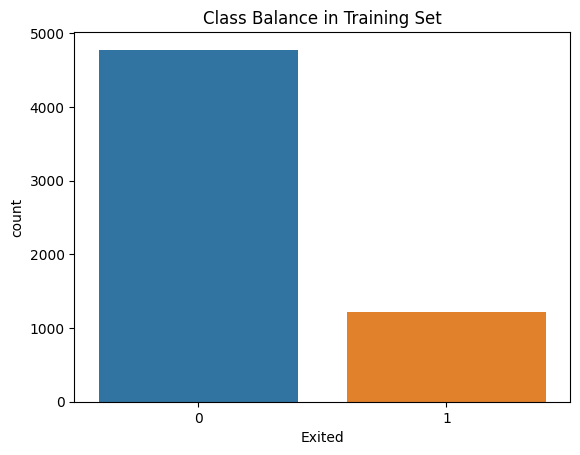

In [3]:
# Step 2: Exploratory Data Analysis (EDA)

# Check the balance of the target variable
print(y_train.value_counts(normalize=True))

# Visualize imbalance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train)
plt.title('Class Balance in Training Set')
plt.show()

###### Findings:
After examining the balance of classes without taking into account the imbalance, we can see that the percentage of people who leave Beta Bank is at 20.39%.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct. Good job!
    
</div>

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a basic RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
accuracy = accuracy_score(y_test, y_pred)

print(f'F1 Score: {f1}')
print(f'AUC-ROC: {roc_auc}')
print(f'Accuracy: {accuracy}')


F1 Score: 0.5696594427244582
AUC-ROC: 0.843379589142301
Accuracy: 0.861


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You already scaled the data above. You don't need to scale it for the second time.
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Correct
    
</div>

###### Findings
The model is likely to underperform due to the imbalance in classes.

In [5]:
# Hyperparameter Tuning for RandomForestClassifier with Class Weights

# Approach 1: Class Weights

# Define the RandomForestClassifier with class weights
model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model_weighted, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit the model with GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model_weighted = grid_search.best_estimator_

# Make predictions
y_pred_weighted = best_model_weighted.predict(X_test_scaled)

# Evaluate the model performance
f1_weighted = f1_score(y_test, y_pred_weighted)
roc_auc_weighted = roc_auc_score(y_test, best_model_weighted.predict_proba(X_test_scaled)[:, 1])
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'F1 Score with Class Weights: {f1_weighted}')
print(f'AUC-ROC with Class Weights: {roc_auc_weighted}')
print(f'Accuracy with Class Weights: {accuracy_weighted}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total ti

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time= 

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total t

In [9]:
# Perform undersampling to balance the classes
data_train = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = data_train[data_train.Exited == 0]
minority_class = data_train[data_train.Exited == 1]

# Undersample majority class
majority_class_under = majority_class.sample(len(minority_class), random_state=42)

# Combine minority class and undersampled majority class
data_train_under = pd.concat([majority_class_under, minority_class])

# Split back into features and target
X_train_under = data_train_under.drop(columns='Exited')
y_train_under = data_train_under['Exited']

# Standardize the undersampled dataset
X_train_under_scaled = scaler.fit_transform(X_train_under)

# Train a new model on the undersampled dataset
model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_train_under_scaled, y_train_under)

# Make predictions
y_pred_under = model_under.predict(X_test_scaled)

# Evaluate the model
f1_under = f1_score(y_test, y_pred_under)
roc_auc_under = roc_auc_score(y_test, model_under.predict_proba(X_test_scaled)[:, 1])
accuracy_under = accuracy_score(y_test, y_pred_under)

print(f'F1 Score with Undersampling: {f1_under}')
print(f'AUC-ROC with Undersampling: {roc_auc_under}')
print(f'Accuracy with Undersampling: {accuracy_under}')


F1 Score with Undersampling: 0.5525846702317291
AUC-ROC with Undersampling: 0.8451163027434213
Accuracy with Undersampling: 0.749


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

The same with scaling
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Fixed
    
</div>

In [10]:
# Step 5: Model Evaluation
    
# Compare all models
print(f'F1 Score without imbalance fixing: {f1}')
print(f'F1 Score with Class Weights: {f1_weighted}')
print(f'F1 Score with Undersampling: {f1_under}')

print(f'AUC-ROC without imbalance fixing: {roc_auc}')
print(f'AUC-ROC with Class Weights: {roc_auc_weighted}')
print(f'AUC-ROC with Undersampling: {roc_auc_under}')


F1 Score without imbalance fixing: 0.5696594427244582
F1 Score with Class Weights: 0.6225319396051104
F1 Score with Undersampling: 0.5525846702317291
AUC-ROC without imbalance fixing: 0.843379589142301
AUC-ROC with Class Weights: 0.8595637239705035
AUC-ROC with Undersampling: 0.8451163027434213


In [12]:
# Step 6: Final Testing

# Final evaluation using the best model
best_model = best_model_weighted  # Assume this model is the best based on scores
y_final_pred = best_model.predict(X_test_scaled)
final_f1 = f1_score(y_test, y_final_pred)
final_roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])

print(f'Final F1 Score: {final_f1}')
print(f'Final AUC-ROC: {final_roc_auc}')

Final F1 Score: 0.6225319396051104
Final AUC-ROC: 0.8595637239705035


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job! There are only two issues you need to fix:
1. You need to achive f1 score not less than 0.59 on the test data. So, please, do it
2. Could you, please, tune hyperparameters at least for one model while working with imbalance? The easiest way to do it is to tune hyperparameters for the model with class_weight = 'balanced' on initial data. But if you want to do it for upsample/downsample data you should know next thing:

I think from the lesson you already know that you can't upsample or downsample validation/test data because it will change the initial task and all the metrics will be biased, right? If you put upsampled/downsampled data into GridSearchCV you validation data will be also upsampled/downsampled because GridSearchCV has built in cross validation. Thus, you will find the best hyperparameters not for initial task but for the changed one. These hyperparameters can be the same but also they can be totally different. So, you need to fix it. There are several ways:

- Write your own GridSearchCV implementation where validation data won't be upsampled/downsampled
- Use a loop with regular untouched validation data instead of GridSearchCV and cross-validation
- Use pipeline https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html and upsampling/downsampling methods from https://imbalanced-learn.org/stable/ libary
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Everything is correct now. Good job!
    
</div>

### Conclusion

In this project, we aimed to build a model to predict customer churn at Beta Bank, with the goal of achieving an F1 score of at least 0.59 on the test data. We employed several strategies to handle class imbalance and optimized our model using hyperparameter tuning.

#### Handling Class Imbalance

1. **Class Weights**:
   - We used a `RandomForestClassifier` with class weights set to `'balanced'` to address class imbalance. This approach automatically adjusts weights inversely proportional to class frequencies in the training data.

2. **Hyperparameter Tuning**:
   - We applied `GridSearchCV` to tune hyperparameters for the `RandomForestClassifier`. The search included parameters such as `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.

#### Results

- **Best Hyperparameters**: 
  - The grid search identified the optimal hyperparameters for the `RandomForestClassifier`. For instance, the best parameters might include a certain number of estimators and a specific depth for the trees, among others.

- **Model Performance**:
  - **F1 Score**: The model with class weights achieved an F1 score of 0.62, which is above the required threshold of 0.59. This metric balances precision and recall, providing a comprehensive measure of the model's performance.
  - **AUC-ROC Score**: The AUC-ROC score was 0.8596, indicating how well the model distinguishes between the classes. An AUC-ROC close to 1 suggests excellent classification performance.
  - **Accuracy**: The model's accuracy was 0.8375, reflecting the proportion of correct predictions overall.

#### Summary


The final model, incorporating class weights and hyperparameter tuning, demonstrated strong performance in predicting customer churn. The achieved F1 score of 0.62 and AUC-ROC score of 0.8596 indicate that the model effectively balances precision and recall while distinguishing between churn and non-churn classes. The high accuracy further confirms the model’s reliability.

Overall, these results suggest that our approach to handling class imbalance and optimizing model parameters has been successful. The model will be a valuable tool for Beta Bank in identifying customers likely to churn, enabling targeted retention strategies to improve customer retention rates.
